[1 2 1 2 0 2 2 0 2 0]
[[-2.43903234  3.06968421 -0.86190836  7.00466087]
 [ 9.07263786 -2.73121086  5.31293601  0.1493593 ]
 [-1.11611116  2.92052858 -0.84797337  7.8745901 ]
 [ 8.84909495 -2.49400436  6.06971733  0.73362193]
 [ 1.02513256  4.59526417  1.85554301  1.0826916 ]
 [10.22578703 -2.33855823  5.68426137  0.40038403]
 [ 9.75327908 -2.53941916  5.69608926  1.13985105]
 [ 1.40523204  4.87433826  2.78855688  1.32393963]
 [ 9.65550394 -2.46535599  5.74962161  0.510832  ]
 [ 0.67761204  4.18482646  1.34323707  0.65100372]]


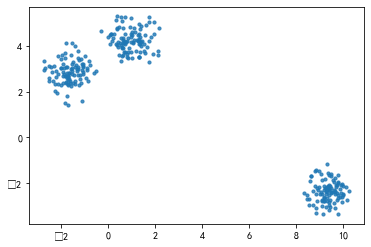

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets.samples_generator import make_blobs
x,y_true = make_blobs(n_samples=300,n_features=4, cluster_std=0.5,random_state=0)
print(y_true[:10])
print(x[:10])
plt.scatter(x[:,0],x[:,1],cmap='Reds',s=10,alpha=0.8)
#A scatter plot of *y* vs. *x* with varying marker size and/or color.
#Generate isotropic Gaussian blobs for clustering.

[-2.43903234e+00  9.07263786e+00 -1.11611116e+00  8.84909495e+00
  1.02513256e+00  1.02257870e+01  9.75327908e+00  1.40523204e+00
  9.65550394e+00  6.77612044e-01 -2.32782204e+00  9.45549583e+00
  5.47353035e-02  9.32244416e+00  1.72351235e+00 -1.71922672e+00
 -8.67335575e-01  9.92133014e+00 -1.78066281e+00  9.95585354e-01
  1.08040757e+00  8.84498056e+00  9.63843111e+00  9.28265111e+00
  9.62531072e+00 -1.91821859e+00 -1.09560601e+00  9.45300741e+00
 -1.85513585e+00  9.83247868e-02 -1.05566995e+00  8.42403310e-01
  8.83743243e-01  8.82507035e+00  9.55123655e+00  2.30641282e-01
  1.54597042e+00 -6.02108390e-01  1.93774109e+00 -1.06215146e+00
  9.42742083e+00  9.61198629e+00 -8.94365094e-01 -1.18867365e+00
 -2.37101903e+00 -1.85618050e+00 -8.21317981e-01 -1.78566353e+00
 -1.36832370e+00  1.95422623e+00 -2.71169747e+00 -1.66473928e+00
 -1.48961081e+00  1.53958804e+00  9.52687469e+00 -1.98590640e+00
  1.27217169e-01 -1.80405883e+00 -2.70899092e+00  2.16784247e+00
 -7.82226032e-01  8.20826

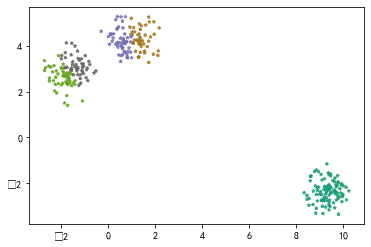

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=5)
kmeans.fit(x) #Compute k-means clustering.
y_kmeans = kmeans.predict(x) #Predict the closest cluster each sample in X belongs to.
plt.scatter(x[:,0],x[:,1],c=y_kmeans, cmap='Dark2',s=10,alpha=0.8,marker='*')  #array-like or list of colors or color
# print(x[:,0])

[ 5.10387  6.61971 48.9929  ... 41.0645  32.8874  30.9325 ]


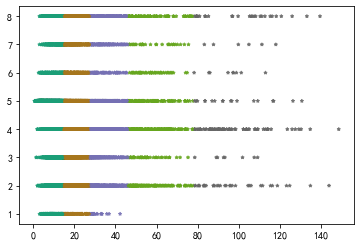

In [55]:
import os
import xlrd
from sklearn.cluster import KMeans
os.chdir("C:/Users/everi/Desktop/Code/Python/Py2021")
df01 = xlrd.open_workbook('DL_info_kmeans.xls')
table = df01.sheets()[0]
data = []
for i in range(table.nrows):
    if i == 0:
        continue
    else:
        data.append(table.row_values(i)[1:])
featureList = ['Lesion_diameters_long', 'Lesion_diameters_short']
mdl = pd.DataFrame.from_records(data, columns=featureList)
mdl_new = np.array(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']])  #2d
# result = pd.Series.from_records(data, columns=['Coarse_lesion_type'])
# result =data['Coarse_lesion_type']
print(mdl_new[:,0])
kmeans = KMeans(n_clusters=5,random_state=5)
kmeans.fit(mdl_new) #Compute k-means clustering.
y_kmeans = kmeans.predict(mdl_new) #Predict the closest cluster each sample in X belongs to.
plt.scatter(mdl_new[:,0],mdl_new[:,1],c=y_kmeans, cmap='Dark2',s=10,alpha=0.8,marker='*')  #array-like or list of colors or color


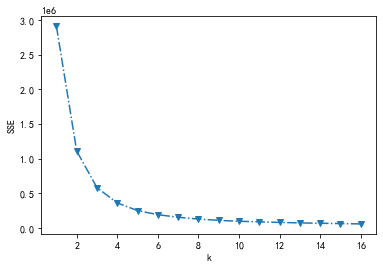

In [66]:
import os
import xlrd
from sklearn.cluster import KMeans
os.chdir("C:/Users/everi/Desktop/Code/Python/Py2021")
df01 = xlrd.open_workbook('DL_info_kmeans.xls')
table = df01.sheets()[0]
data = []
for i in range(table.nrows):
    if i == 0:
        continue
    else:
        data.append(table.row_values(i)[1:])
featureList = ['Lesion_diameters_long', 'Lesion_diameters_short']
mdl = pd.DataFrame.from_records(data, columns=featureList)
mdl_new = np.array(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']])  #2d
SSE = []
for k in  range(1,17):
    group = KMeans(n_clusters=k)
    group.fit(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']])
    SSE.append(group.inertia_)
X=range(1,17)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, linestyle='-.',marker ='v')
plt.show()  #group number is greater than 8

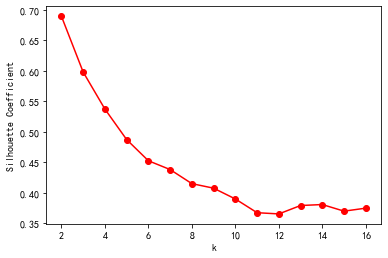

In [68]:
import os
import xlrd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
os.chdir("C:/Users/everi/Desktop/Code/Python/Py2021")
df01 = xlrd.open_workbook('DL_info_kmeans.xls')
table = df01.sheets()[0]
data = []
for i in range(table.nrows):
    if i == 0:
        continue
    else:
        data.append(table.row_values(i)[1:])
featureList = ['Lesion_diameters_long', 'Lesion_diameters_short']
mdl = pd.DataFrame.from_records(data, columns=featureList)
mdl_new = np.array(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']])  #2d
Scores = []  
for k in range(2, 17):
    estimator = KMeans(n_clusters=k)      
    estimator.fit(np.array(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']]))
    Scores.append(silhouette_score(np.array(mdl[['Lesion_diameters_long', 'Lesion_diameters_short']]), estimator.labels_, metric='euclidean'))
X = range(2, 17)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.plot(X, Scores, 'ro-')
plt.show()#group number 15 = 3*5   
#select 3 kind of radio 2:1, 1:2 ,1:1 ,select 5 kinds of width value 